# Instacart Data Analysis

## Introduction

This project aims to analyze Instacart data, a grocery delivery platform, to extract insights into customer purchasing behavior and order patterns. The dataset contains information on orders, products, departments, and customer purchase history.

### Objectives
- Analyze temporal order patterns
- Identify the most popular products and repurchase rates
- Understand customer purchasing behavior
- Generate actionable business insights

### Project Structure
1. Data Preparation and Cleaning
2. Exploratory Analysis
3. Purchase Pattern Analysis
4. Conclusions and Recommendations

## Data Dictionary

The dataset consists of five main tables:

- `instacart_orders.csv`: each row corresponds to an order placed in the Instacart app
    - `'order_id'`: unique identifier for each order
    - `'user_id'`: unique identifier for each customer's account
    - `'order_number'`: number of times the customer has placed an order
    - `'order_dow'`: day of the week the order was placed (0 represents Sunday)
    - `'order_hour_of_day'`: hour of the day the order was placed
    - `'days_since_prior_order'`: number of days since the customer's previous order

- `products.csv`: each row represents a unique product available for purchase
    - `'product_id'`: unique identifier for each product
    - `'product_name'`: name of the product
    - `'aisle_id'`: unique identifier for each supermarket aisle category
    - `'department_id'`: unique identifier for each supermarket department category

- `order_products.csv`: each row corresponds to an item included in an order
    - `'order_id'`: unique identifier for each order
    - `'product_id'`: unique identifier for each product
    - `'add_to_cart_order'`: sequential order in which the item was added to the cart
    - `'reordered'`: 0 if the customer has never purchased the product before, 1 if they have

- `aisles.csv`
    - `'aisle_id'`: unique identifier for each supermarket aisle category
    - `'aisle'`: name of the aisle

- `departments.csv`
    - `'department_id'`: unique identifier for each supermarket department category
    - `'department'`: name of the department


# Step 1: Data Overview

## Analysis Plan
1. Import data using pandas
2. Examine the basic structure of each DataFrame
3. Check data types and missing values
4. Identify potential issues in the data

## Data Loading

In [23]:
# Importing libraries - To handle data and create charts!
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# Reading datasets into DataFrames - There are 5 DataFrames
df_orders = pd.read_csv("datasets/instacart_orders.csv", sep=';')
df_products = pd.read_csv("datasets/products.csv", sep=';')
df_order_products = pd.read_csv("datasets/order_products.csv", sep=';')
df_aisles = pd.read_csv("datasets/aisles.csv", sep=';')
df_departments = pd.read_csv("datasets/departments.csv", sep=';')


In [3]:
# Examining the structure of the orders DataFrame
print("\n-----------------------\nOrders DataFrame Structure\n")
df_orders.info()
print("\n-----------------------\nFirst records:\n")
print(df_orders.head())



-----------------------
Orders DataFrame Structure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB

-----------------------
First records:

   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516            56       

### Analysis of the Orders DataFrame
- A total of 478,967 records
- 6 columns, including 5 integers and 1 float
- Missing values only in the 'days_since_prior_order' column (28,819 records)
- Each record represents a unique order with temporal and customer information

In [4]:
# Examining the structure of the products DataFrame
print("\n-----------------------\nProducts DataFrame Structure\n")
df_products.info()
print("\n-----------------------\nFirst records:\n")
print(df_products.head())


-----------------------
Products DataFrame Structure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB

-----------------------
First records:

   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  


### Analysis of the Products DataFrame
- 49,694 registered products
- 4 columns: product_id, product_name, aisle_id, department_id
- 1,258 products without a registered name
- All IDs (product, aisle, and department) are filled

In [5]:
# Examining the structure of the order_products DataFrame
print("\n-----------------------\nOrder Items DataFrame Structure\n")
df_order_products.info(verbose=True)
print("\n-----------------------\nFirst records:\n")
print(df_order_products.head(20))


-----------------------
Order Items DataFrame Structure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB

-----------------------
First records:

    order_id  product_id  add_to_cart_order  reordered
0    2141543       11440               17.0          0
1     567889        1560                1.0          1
2    2261212       26683                1.0          1
3     491251        8670               35.0          1
4    2571142        1940                5.0          1
5    2456893       21616                4.0          1
6     644579       12341                5.0          1
7    2231852       44925               10.0          1
8    3185766       36259               14.0       

### Analysis of the Order_Products DataFrame
- 4,545,007 records of order items
- 4 columns: order_id, product_id, add_to_cart_order, reordered
- 836 missing values in the add_to_cart_order column
- Each row represents a specific item in an order

In [6]:
# Examining the structure of the aisles DataFrame
print("\n-----------------------\nAisles DataFrame Structure\n")
df_aisles.info()
print("\n-----------------------\nFirst records:\n")
print(df_aisles.head())


-----------------------
Aisles DataFrame Structure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB

-----------------------
First records:

   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation


### Analysis of the Aisles DataFrame
- 134 registered aisles
- Complete data with no missing values
- Simple structure with ID and aisle name

In [7]:
# Examining the structure of the departments DataFrame
print("\n-----------------------\nDepartments DataFrame Structure\n")
df_departments.info()
print("\n-----------------------\nFirst records:\n")
print(df_departments.head())


-----------------------
Departments DataFrame Structure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes

-----------------------
First records:

   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol


### Analysis of the Departments DataFrame
- 21 registered departments
- Complete data with no missing values
- Simple structure with ID and department name

## Initial Analysis Conclusions

1. **Data Integrity**
   - Well-defined relational structure between tables
   - Missing values concentrated in specific columns
   - Consistent ID system across tables

2. **Points of Attention**
   - Need to handle missing values in 'days_since_prior_order'
   - Investigation of products without a name
   - Analysis of missing values in the add-to-cart order

# Step 2: Data Preparation

## Processing Plan
1. Check and handle duplicate values
2. Identify and handle missing values
3. Validate data types

### `orders` DataFrame

In [8]:
# Checking for duplicates in the orders DataFrame
print('Number of duplicate values:', df_orders.duplicated().sum())
print('\nDuplicate records:')
print(df_orders[df_orders.duplicated()])

Number of duplicate values: 15

Duplicate records:
        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   


### Duplicate Analysis
There are duplicate rows, and in all of them, the orders were placed at 2 AM on Wednesdays.  
This can be observed in the 'order_hour_of_day' column and the 'order_dow' column, where '0' represents Sunday, and the days progress sequentially from there.

In [9]:
# Detailed analysis of orders placed at 2 AM
print('Count of orders at 2 AM:\n')
print(df_orders[df_orders['order_hour_of_day'] == 2].count())
print('\nDistribution of orders at 2 AM:\n')
print(df_orders[df_orders['order_hour_of_day'] == 2].value_counts())


Count of orders at 2 AM:

order_id                  1004
user_id                   1004
order_number              1004
order_dow                 1004
order_hour_of_day         1004
days_since_prior_order     941
dtype: int64

Distribution of orders at 2 AM:

order_id  user_id  order_number  order_dow  order_hour_of_day  days_since_prior_order
1919531   191501   32            3          2                  7.0                       2
467134    63189    21            3          2                  2.0                       2
1918001   188546   14            3          2                  16.0                      2
2282673   86751    49            3          2                  2.0                       2
1021560   53767    3             3          2                  9.0                       2
                                                                                        ..
1198786   183503   16            1          2                  6.0                       1
1203051   32927   

### Duplicate Analysis - Orders DataFrame  
What does this result mean?  

We have insufficient information to determine the cause of this issue, but we need to investigate why the duplicates occur on Wednesdays.  
We cannot assume an attack or an isolated error because, although the duplicates happened on Wednesdays, they occurred on different days (as observed in the 'days_since_prior_order' column).  

I would ask the company if any electronic process takes place during this period every Wednesday, such as a database synchronization or another process that could be causing this error.

In [10]:
# Removing duplicates from the orders DataFrame
df_orders = df_orders.drop_duplicates().reset_index(drop=True)

# Post-removal verification
print('Number of duplicates after processing:', df_orders.duplicated().sum())

Number of duplicates after processing: 0


### Conclusions:

There were only a few duplicate orders, which can occur for various reasons.  
My guess is that there might be an issue with database updates scheduled around this time (2 AM) on Wednesdays.  
The data has been processed, and the index has been reset according to best practices for this procedure.

### `products` DataFrame

In [11]:
# Checking for duplicates in the products DataFrame
print('Number of duplicates in products:', df_products.duplicated().sum())
print('\nVerification by department:')
print(df_products[df_products['department_id'].duplicated()].groupby('department_id')['department_id'].count())

Number of duplicates in products: 0

Verification by department:
department_id
1     4007
2      547
3     1515
4     1683
5     1053
6     1138
7     4365
8      971
9     1857
10      37
11    6563
12     906
13    5371
14    1116
15    2091
16    3448
17    3084
18    1080
19    6263
20    1321
21    1257
Name: department_id, dtype: int64


### Duplicate Analysis - Products DataFrame
- No complete duplicate records
- Duplicates in `department_id` are expected (different products in the same department)
- Product names converted to lowercase for standardization

### `departments` DataFrame

In [12]:
# Checking for duplicates in the departments DataFrame
print('Number of duplicates in departments:', df_departments.duplicated().sum())
print('\nDuplicate records:')
print(df_departments[df_departments.duplicated()])

Number of duplicates in departments: 0

Duplicate records:
Empty DataFrame
Columns: [department_id, department]
Index: []


In [13]:
# Detailed analysis of IDs
print('\nChecking unique IDs:')
print(df_departments['department_id'].unique())
print('\nTotal unique departments:', df_departments['department_id'].nunique())


Checking unique IDs:
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]

Total unique departments: 21


### Duplicate Analysis - Departments DataFrame
- No duplicates identified
- 21 unique departments
- Sequential and well-structured IDs (1-21)

### `aisles` DataFrame 

In [14]:
# Checking for duplicates in the aisles DataFrame
print('Number of duplicates in aisles:', df_aisles.duplicated().sum())
print('\nDuplicate records:')
print(df_aisles[df_aisles.duplicated()])

Number of duplicates in aisles: 0

Duplicate records:
Empty DataFrame
Columns: [aisle_id, aisle]
Index: []


In [15]:
# Analysis of unique IDs
print('\nTotal unique aisles:', df_aisles['aisle_id'].nunique())


Total unique aisles: 134


### Duplicate Analysis - Aisles DataFrame
- No duplicates identified
- 134 unique aisles
- Data structure is intact

### `order_products` DataFrame

In [16]:
# Checking for duplicates in the order_products DataFrame
print('Number of duplicates in order_products:', df_order_products.duplicated().sum())
print('\nDuplicate records:')
print(df_order_products[df_order_products.duplicated(subset=['order_id', 'product_id'])])

Number of duplicates in order_products: 0

Duplicate records:
Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []


In [17]:
# Analysis of unique values
print('\nOrder ID analysis:')
print('Unique values:', df_order_products['order_id'].unique())
print('\nTotal unique orders:', df_order_products['order_id'].nunique())

print('\nProduct ID analysis:')
print('Unique values:', df_order_products['product_id'].unique())
print('\nTotal unique products:', df_order_products['product_id'].nunique())


Order ID analysis:
Unique values: [2141543  567889 2261212 ...  812418 2666881 1461911]

Total unique orders: 450046

Product ID analysis:
Unique values: [11440  1560 26683 ... 49153  8182 40024]

Total unique products: 45573


### Duplicate Analysis - Order_Products DataFrame
- No direct duplicates identified
- 450,046 unique orders
- 45,573 unique products in orders
- Complex situation due to the nature of the data:
  - An order can contain multiple products
  - A product can appear in multiple orders
  - Duplicates of order_id/product_id combinations are important for repurchase analysis

## Identifying and Removing Missing Values

We identified missing values in the following columns:
- 'product_name' column in the products table
- 'days_since_prior_order' column in the orders table
- 'add_to_cart_order' column in the order_products table

### `products` DataFrame

In [18]:
# Analysis of missing values in the products DataFrame
print('Checking for missing values in the products DataFrame:')
print(df_products.isna().sum())
print('\nChecking for missing values in the "product_name" column:')
print(df_products['product_name'].isna().sum())

Checking for missing values in the products DataFrame:
product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64

Checking for missing values in the "product_name" column:
1258


### Missing Values Analysis - Products DataFrame
- 1,258 products without a registered name
- All other columns are fully populated

In [19]:
# Checking unnamed products by aisle
unnamed_products_section = df_products.loc[df_products['product_name'].isna(), 'aisle_id']
print(unnamed_products_section)


37       100
71       100
109      100
296      100
416      100
        ... 
49552    100
49574    100
49640    100
49663    100
49668    100
Name: aisle_id, Length: 1258, dtype: int64


In [20]:
# Checking unnamed products by department
unnamed_products_department = df_products.loc[df_products['product_name'].isna(), 'department_id']
print(unnamed_products_department)

37       21
71       21
109      21
296      21
416      21
         ..
49552    21
49574    21
49640    21
49663    21
49668    21
Name: department_id, Length: 1258, dtype: int64


In [25]:
# Checking affected aisles and departments
print('Departments table')
print(df_departments[df_departments['department_id'] == 21])
print('\nAisles table')
print(df_aisles[df_aisles['aisle_id'] == 100])

# Handling missing values
df_departments['department'] = df_departments['department'].replace('missing', np.nan).fillna('Unknown')
df_aisles['aisle'] = df_aisles['aisle'].fillna('Unknown')

Departments table
    department_id department
20             21    Unknown

Aisles table
    aisle_id    aisle
99       100  missing


### Conclusions on Missing Values in the Products DataFrame
- Missing values are concentrated in aisle 100 and department 21
- Aisle and department marked as "Unknown" after processing
- Systematic pattern suggests a possible data integration issue
- This table does not provide access to the name of this aisle and department.

### `orders` DataFrame

In [26]:
# Analysis of missing values in the orders DataFrame
print('Checking for missing values in the orders DataFrame:')
print(df_orders.isna().sum())

Checking for missing values in the orders DataFrame:
order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [27]:
# Checking for missing values in non-initial orders
order_without_customer = df_orders[(df_orders['days_since_prior_order'].isna()) & (df_orders['order_number'] > 1)]
print('Non-initial orders with missing values:')
print(order_without_customer)

Non-initial orders with missing values:
Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


### Missing Values Analysis - Orders DataFrame
- 28,817 missing values in 'days_since_prior_order'
- Missing values appear only in first orders
- Expected behavior since there is no previous order for first-time purchases

### `order_products` DataFrame

In [28]:
# Analysis of missing values in the order_products DataFrame
print('Checking for missing values in the order_products DataFrame:')
print(df_order_products.isna().sum())

Checking for missing values in the order_products DataFrame:
order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [29]:
# Analysis of values in the "add_to_cart_order" column
print('Minimum values in the "add_to_cart_order" column:')
print(df_order_products['add_to_cart_order'].min())
print('\nMaximum values in the "add_to_cart_order" column:')
print(df_order_products['add_to_cart_order'].max())

Minimum values in the "add_to_cart_order" column:
1.0

Maximum values in the "add_to_cart_order" column:
64.0


In [30]:
# Checking for products with missing add-to-cart order
missing_order_ids = df_order_products.loc[df_order_products['add_to_cart_order'].isna(), 'product_id']
print('Products with missing add-to-cart order:')
print(missing_order_ids)

# Handling missing values
df_order_products.fillna({'add_to_cart_order': 999}, inplace=True)
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].astype(int)

Products with missing add-to-cart order:
737         5068
9926       43867
14394      11688
16418       4142
30114      42828
           ...  
4505662     7411
4511400      260
4517562     9517
4534112    17835
4535739    17949
Name: product_id, Length: 836, dtype: int64


### Missing Values Analysis - Order_Products DataFrame
- 836 missing values in 'add_to_cart_order'
- Add-to-cart order ranges from 1 to 64 products per order
- Missing values replaced with 999 for identification in future analyses

## General Conclusions on Data Processing
1. **Missing Values**
   - Identified and handled in three main DataFrames
   - Specific treatments applied to each case
   - Data traceability maintained after processing

2. **Impact on Analysis**
   - Data consistency preserved for future analyses
   - Processing does not compromise relational integrity
   - Substitute values chosen to facilitate identification

# Step 3: Data Analysis

## A. Basic Analysis

### 1. Checking Values in Temporal Columns

In [31]:
# Checking values in order_hour_of_day
print('Minimum value in the "order_hour_of_day" column:', df_orders['order_hour_of_day'].min())
print('Maximum value in the "order_hour_of_day" column:', df_orders['order_hour_of_day'].max())

Minimum value in the "order_hour_of_day" column: 0
Maximum value in the "order_hour_of_day" column: 23


In [32]:
# Checking values in order_dow
print('Minimum value in the "order_dow" column:', df_orders['order_dow'].min())
print('Maximum value in the "order_dow" column:', df_orders['order_dow'].max())

Minimum value in the "order_dow" column: 0
Maximum value in the "order_dow" column: 6


### Temporal Data Analysis
- Hours of the day: range from 0 to 23 (24-hour format)
- Days of the week: range from 0 to 6 (Sunday to Saturday)
- Temporal data is consistent and within expected ranges

### [A2] How many people place orders at each hour of the day?

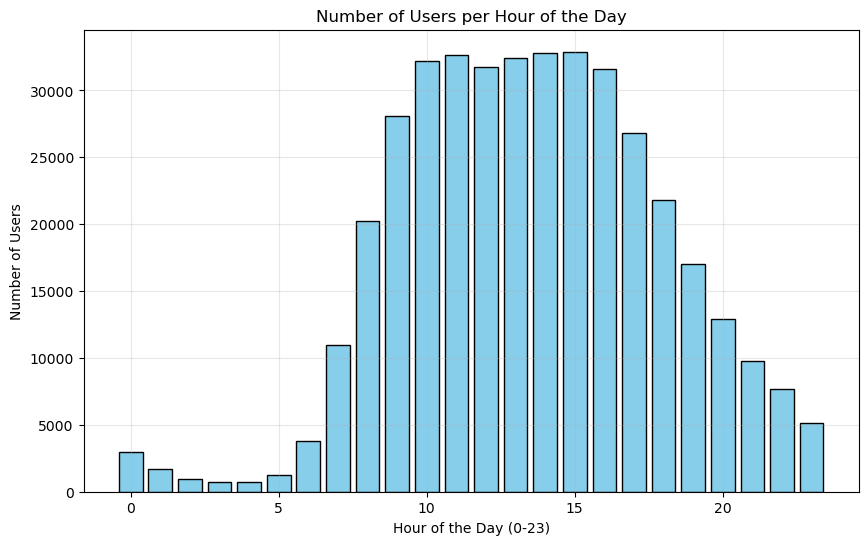

In [33]:
# Analysis of orders by hour of the day
customers_per_hour = df_orders.groupby('order_hour_of_day')['user_id'].nunique()

# Visualization using a bar chart
plt.figure(figsize=(10, 6))
plt.bar(customers_per_hour.index, customers_per_hour.values, color='skyblue', edgecolor='black')
plt.title('Number of Users per Hour of the Day')
plt.xlabel('Hour of the Day (0-23)')
plt.ylabel('Number of Users')
plt.grid(True, alpha=0.3)
plt.show()

### Analysis of the "Number of Users per Hour of the Day" Chart:

- The peak sales period is between 10 AM and 3 PM.
- The day of the week with the highest number of purchases is Sunday.
- Most users take 30 days to make a new purchase.

### [A3] On which day of the week do people shop?

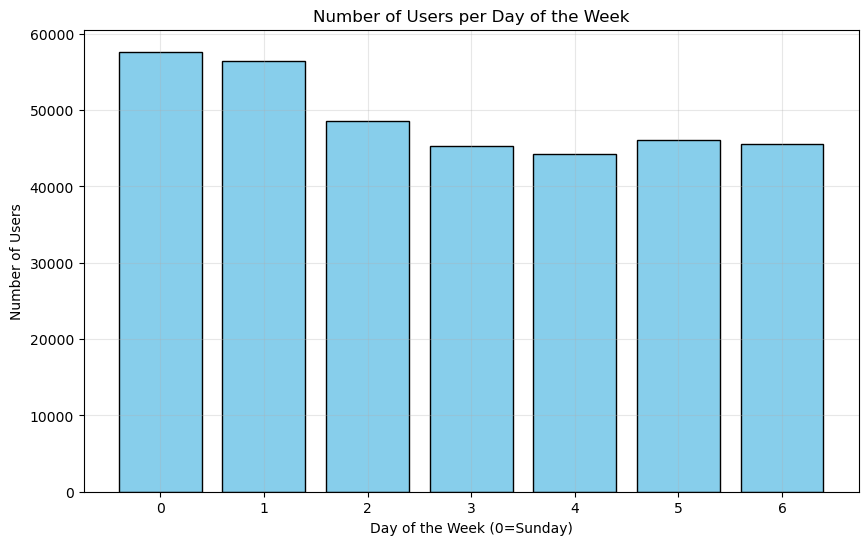

In [35]:
# Analysis of orders by day of the week
customers_per_weekday = df_orders.groupby('order_dow')['user_id'].nunique()

# Visualization using a bar chart
plt.figure(figsize=(10, 6))
plt.bar(customers_per_weekday.index, customers_per_weekday.values, color='skyblue', edgecolor='black')
plt.title('Number of Users per Day of the Week')
plt.xlabel('Day of the Week (0=Sunday)')
plt.ylabel('Number of Users')
plt.grid(True, alpha=0.3)
plt.show()

### Analysis of the "Number of Users per Day of the Week" Chart:
- The day with the highest number of purchases is Sunday.

### [A4] How long do people wait before placing another order?

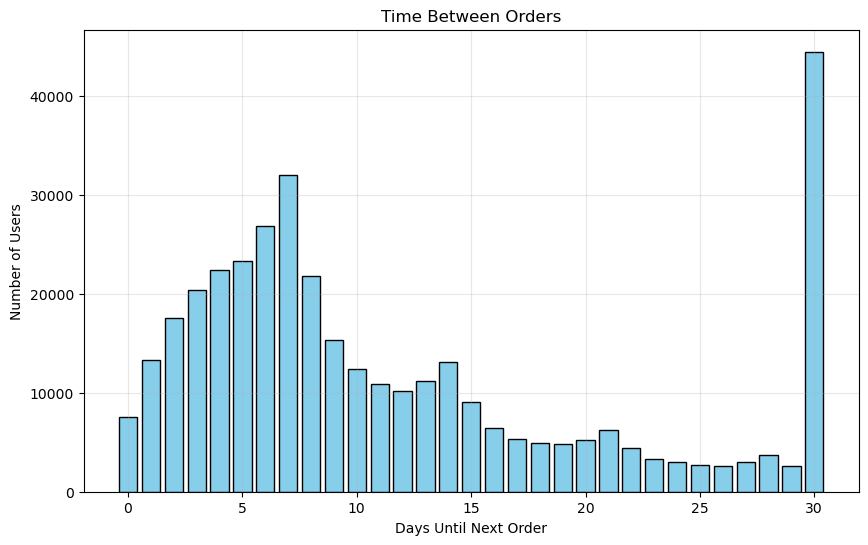

In [36]:
# Analysis of time between orders
wait_until_next_purchase = df_orders.groupby('days_since_prior_order')['user_id'].nunique()

# Visualization using a bar chart
plt.figure(figsize=(10, 6))
plt.bar(wait_until_next_purchase.index, wait_until_next_purchase.values, color='skyblue', edgecolor='black')
plt.title('Time Between Orders')
plt.xlabel('Days Until Next Order')
plt.ylabel('Number of Users')
plt.grid(True, alpha=0.3)
plt.show()

## Basic Analysis Conclusions

1. **Temporal Patterns**
   - Peak order time between 10 AM and 3 PM
   - Highest volume on Sundays
   - Most users place a new order within 30 days

2. **Operational Insights**
   - Need for increased operational capacity during peak hours
   - Special planning for Sundays
   - Opportunity to encourage repurchases before 30 days

## B. Intermediate Analysis

### 1. Comparison of Orders Between Wednesdays and Saturdays

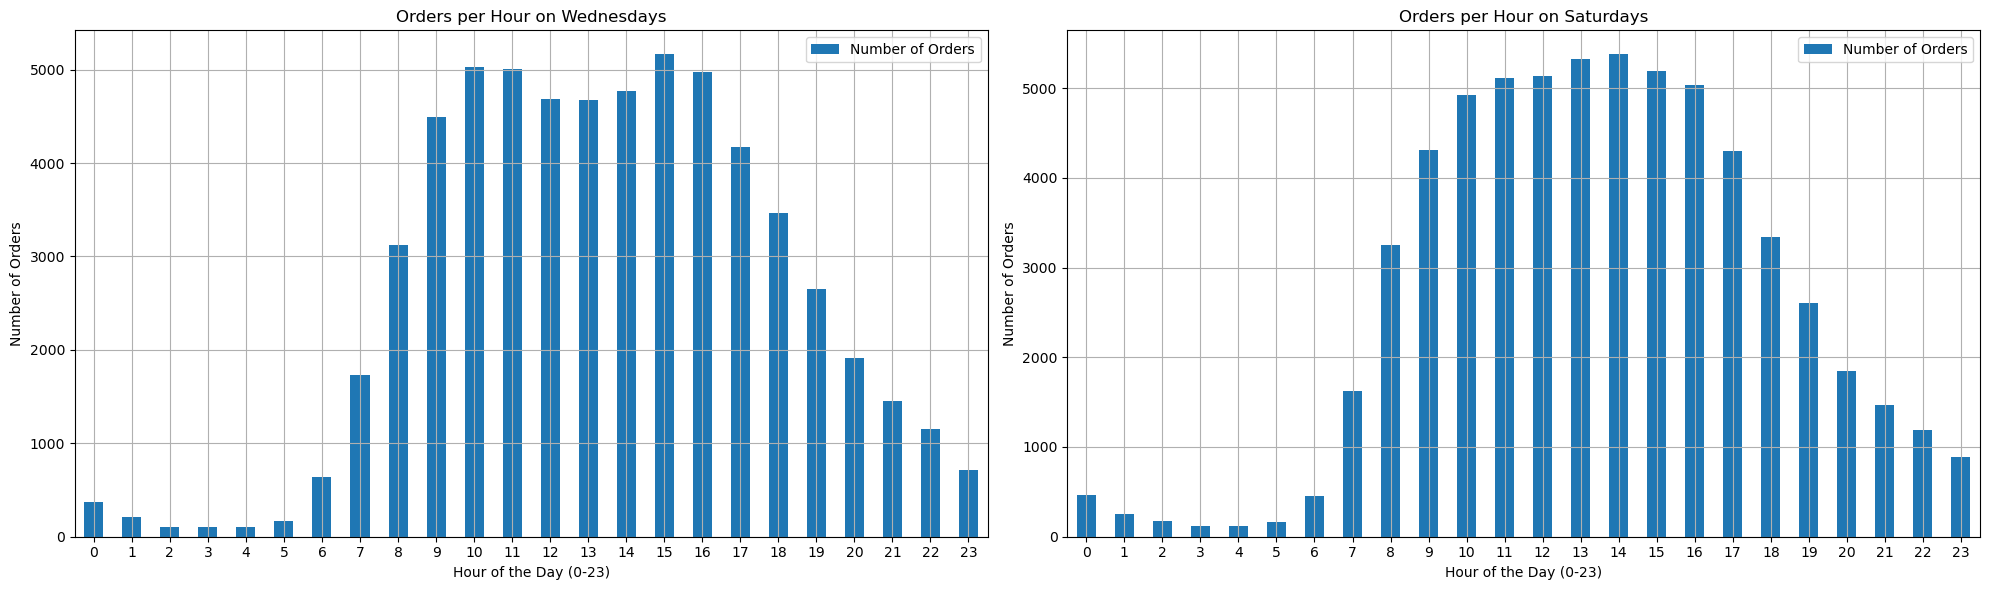

In [37]:
# Filter data for Wednesdays (order_dow = 3)
wednesday_orders = df_orders[df_orders['order_dow'] == 3]
wednesday_orders_per_hour = wednesday_orders.groupby('order_hour_of_day')['order_id'].count()

# Filter data for Saturdays (order_dow = 6)
saturday_orders = df_orders[df_orders['order_dow'] == 6]
saturday_orders_per_hour = saturday_orders.groupby('order_hour_of_day')['order_id'].count()

# Create comparative charts
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

# Wednesday orders chart
df_wednesday = pd.DataFrame({'Hour of the Day': wednesday_orders_per_hour.index, 
                             'Number of Orders': wednesday_orders_per_hour.values})
df_wednesday.plot(ax=ax[0], x='Hour of the Day', y='Number of Orders',
                  title='Orders per Hour on Wednesdays',
                  kind='bar', xlabel='Hour of the Day (0-23)',
                  ylabel='Number of Orders', grid=True)
ax[0].set_xticklabels(df_wednesday['Hour of the Day'], rotation=0)

# Saturday orders chart
df_saturday = pd.DataFrame({'Hour of the Day': saturday_orders_per_hour.index,
                             'Number of Orders': saturday_orders_per_hour.values})
df_saturday.plot(ax=ax[1], x='Hour of the Day', y='Number of Orders',
                 title='Orders per Hour on Saturdays',
                 kind='bar', xlabel='Hour of the Day (0-23)',
                 ylabel='Number of Orders', grid=True)
ax[1].set_xticklabels(df_saturday['Hour of the Day'], rotation=0)

plt.tight_layout()
plt.show()

### Comparative Analysis: Wednesday vs. Saturday
- Wednesdays: More pronounced peak of orders during business hours
- Saturdays: More evenly distributed orders throughout the day
- The difference reflects distinct behavioral patterns between weekdays and weekends

### What is the distribution of the number of orders per customer?

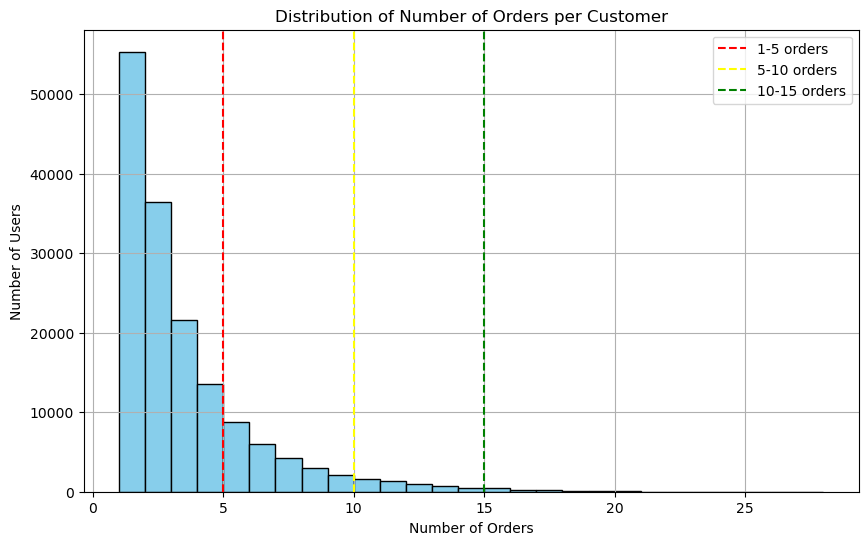

In [38]:
# Analysis of order distribution per customer
orders_per_customer = df_orders.groupby('user_id').size()

# Visualization of the distribution
plt.figure(figsize=(10, 6))
plt.hist(orders_per_customer, bins=range(1, orders_per_customer.max()+1), 
         color='skyblue', edgecolor='black')
plt.title('Distribution of Number of Orders per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Users')
plt.grid(True)
plt.axvline(x=5, color='red', linestyle='--', label='1-5 orders')
plt.axvline(x=10, color='yellow', linestyle='--', label='5-10 orders')
plt.axvline(x=15, color='green', linestyle='--', label='10-15 orders')
plt.legend()
plt.show()

### Analysis of the "Distribution of Number of Orders per Customer" Chart

- Customers with a single order represent the largest individual category, with 55,357 users. This number suggests that many customers may have tried the service or product once but did not return. This could be due to an effective first-purchase strategy, but it also indicates that the company needs to improve customer retention, as there is a sharp decline in purchase frequency. As the number of orders increases, the number of users in each category drops significantly.
- There is a very small number of users with a high number of orders (26 to 28 orders), which may indicate highly loyal customers or possibly bulk buyers. These customers are extremely valuable and could be the focus of loyalty programs or special offers to maintain their engagement.
- The range of 1 to 5 orders has the highest concentration of customers. After this range, there is a noticeable decline in subsequent intervals, making it evident that very few customers place recurring orders beyond their 28th purchase.

### What are the 20 most popular products? Display their IDs and names.

In [39]:
# Analysis of the 20 most frequently ordered products
product_counts = df_order_products['product_id'].value_counts()
product_counts_df = pd.DataFrame({'product_id': product_counts.index, 
                                  'order_count': product_counts.values})
merged_data = pd.merge(product_counts_df, df_products, on='product_id')
top_selling_products = merged_data.sort_values(by='order_count', ascending=False).head(20)

print('Top 20 Best-Selling Products:')
print(top_selling_products[['product_id', 'product_name', 'order_count']])

Top 20 Best-Selling Products:
    product_id              product_name  order_count
0        24852                    Banana        66050
1        13176    Bag of Organic Bananas        53297
2        21137      Organic Strawberries        37039
3        21903      Organic Baby Spinach        33971
4        47209      Organic Hass Avocado        29773
5        47766           Organic Avocado        24689
6        47626               Large Lemon        21495
7        16797              Strawberries        20018
8        26209                     Limes        19690
9        27845        Organic Whole Milk        19600
10       27966       Organic Raspberries        19197
11       22935      Organic Yellow Onion        15898
12       24964            Organic Garlic        15292
13       45007          Organic Zucchini        14584
14       39275       Organic Blueberries        13879
15       49683            Cucumber Kirby        13675
16       28204        Organic Fuji Apple        1254

## Intermediate Analysis Conclusions

1. **Purchase Patterns**
   - Most customers place between 1-5 orders
   - Sharp decline after 5 orders
   - Small group of highly active customers (>15 orders)

2. **Popular Products**
   - Organic products dominate the ranking
   - Fruits and vegetables are the most frequent categories
   - Bananas lead in the number of orders

3. **Business Insights**
   - Opportunity to improve retention after initial purchases
   - Potential for targeted strategies on different days
   - Focus on organic products as a competitive advantage

## C. Advanced Analysis

### 1. Distribution of Items per Order

### How many items do people typically buy in an order? What does the distribution look like?

Statistics of Items per Order:
count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
dtype: float64


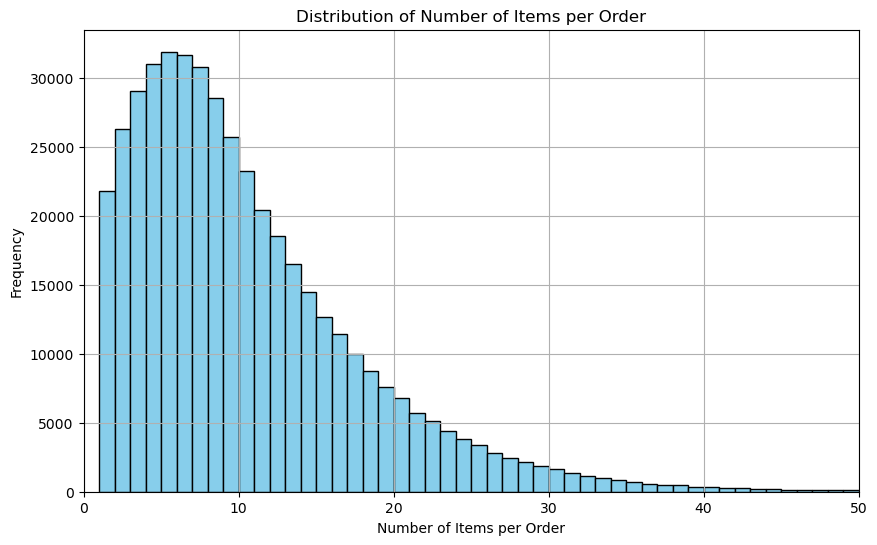

In [40]:
# Count of items per order
items_per_order = df_order_products.groupby('order_id').size()

# Descriptive statistics
print('Statistics of Items per Order:')
print(items_per_order.describe())

# Visualization of the distribution
plt.figure(figsize=(10, 6))
plt.hist(items_per_order, bins=range(1, 51), edgecolor='black', color='skyblue')
plt.title('Distribution of Number of Items per Order')
plt.xlabel('Number of Items per Order')
plt.ylabel('Frequency')
plt.grid(True)
plt.xlim(0, 50)
plt.show()

### Analysis of Item Distribution
- Average of 10 items per order
- 50% of orders contain between 5 and 14 items
- Maximum of 127 items in a single order

### What are the top 20 most frequently included items in repeat orders? Display their IDs and names.

In [41]:
# Analysis of products in repeat orders
reordered_items = df_order_products[df_order_products['reordered'] == 1]
reorder_count = reordered_items.groupby('product_id').size()
reorder_count_df = pd.DataFrame({'product_id': reorder_count.index, 
                                 'reorder_count': reorder_count.values})
merged_dfs = pd.merge(reorder_count_df, df_products, on='product_id')
sorted_merged_dfs = merged_dfs.sort_values(by='reorder_count', 
                                           ascending=False).head(20)

print('Top 20 Most Reordered Products:')
print(sorted_merged_dfs[['product_id', 'product_name', 'reorder_count']])

Top 20 Most Reordered Products:
       product_id              product_name  reorder_count
18104       24852                    Banana          55763
9528        13176    Bag of Organic Bananas          44450
15368       21137      Organic Strawberries          28639
15936       21903      Organic Baby Spinach          26233
34407       47209      Organic Hass Avocado          23629
34828       47766           Organic Avocado          18743
20285       27845        Organic Whole Milk          16251
34725       47626               Large Lemon          15044
20375       27966       Organic Raspberries          14748
12193       16797              Strawberries          13945
19088       26209                     Limes          13327
16700       22935      Organic Yellow Onion          11145
18186       24964            Organic Garlic          10411
32792       45007          Organic Zucchini          10076
36219       49683            Cucumber Kirby           9538
20543       28204       

### Analysis of the Most Reordered Products
- Bananas (both organic and conventional) lead by a wide margin
- Organic products dominate the list, occupying 13 out of 20 positions
- Fruits and vegetables are the most representative categories
- The pattern suggests a strong focus on fresh and healthy products
- Reorder quantities are significant, ranging from 8,389 to 55,763 orders

### [C3] For each product, what percentage of all its orders are repeat purchases?

In [42]:
# Analysis of the reorder proportion per product
reorder_percentage = df_order_products.groupby('product_id')['reordered'].mean().reset_index()
reorder_percentage.rename(columns={'reordered': 'reorder_ratio'}, inplace=True)
reorder_names = pd.merge(reorder_percentage, df_products, on='product_id')
reorder_names = reorder_names.sort_values(by='reorder_ratio', ascending=False)

print('\nProducts with the Highest Reorder Rate:')
print(reorder_names[['product_id', 'product_name', 'reorder_ratio']].head(20))


Products with the Highest Reorder Rate:
       product_id                                       product_name  \
13453       14721                            Bone Strength Take Care   
19195       20949                           Vanilla Sandwich Cookies   
6136         6723                                   Palmiers- Petite   
6144         6732                  Naturally Sparkling Mineral Water   
41319       45088  California Dill Pollen & Garlic Goat Cheese & ...   
41310       45078                                       Pomegranatea   
19258       21016       Parchment Lined 8 in x 3.75 in x 2.5 in Pans   
19248       21005                        Peanut Butter Pie Ice Cream   
32273       35192                         Chocolate Soy Milk Singles   
32277       35197  Mocha Chocolate Chip  Organic Non-Dairy Frozen...   
6211         6810                        Raspberry Goji Paleo Prints   
41274       45040                                 Head Lock Mega Gel   
41269       45035      

### Analysis of Reorder Rates
- 20 products have a 100% reorder rate
- More diverse list, including:
  - Supplements (Bone Strength)
  - Convenience products (Cookies, Baking Mix)
  - Specific products (Dental Tape, Hair Color)
  - Specialty foods (Non-Dairy, Sugar-Free)
- More niche products compared to the highest-volume reorders
- Indicates strong customer loyalty in specific categories

# General Project Conclusion:

I decided to break my conclusions into topics, and they are as follows:

## Key Findings

1. **Temporal Patterns**
   - Peak order time between 10 AM and 3 PM
   - Highest volume on Sundays
   - Distinct patterns between weekdays and weekends
   - Most users return within 30 days

2. **Shopping Behavior**
   - Average of 10 items per order
   - Most customers place between 1-5 orders
   - Orders are concentrated between 5-14 items
   - Small group of highly active customers

3. **Products and Categories**
   - Organic products dominate sales
   - Bananas are the best-selling item
   - Fresh products lead in volume
   - Specific niches show high customer loyalty

## Strategic Recommendations

1. **Operations**
   - Optimize capacity for peak hours
   - Special planning for Sundays
   - Adjust staffing according to weekly patterns

2. **Marketing**
   - Develop a loyalty program
   - Focus on retention after initial purchases
   - Targeted promotions for organic products
   - Different strategies for weekdays and weekends

3. **Product**
   - Maintain a focus on fresh and organic products
   - Develop offers for specific niches
   - Consider pre-packaged essential baskets
   - Ensure availability of the most reordered products

# Thank you for your attention! I hope this helps your journey through the world of data!